# Leg Point Definition
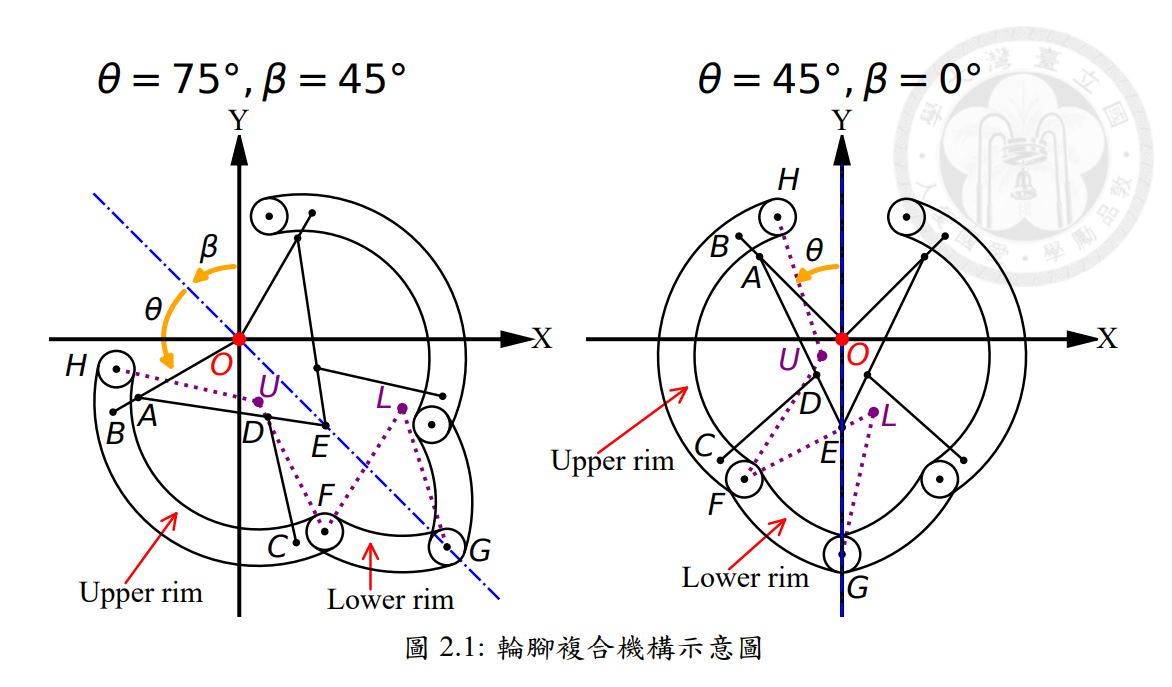
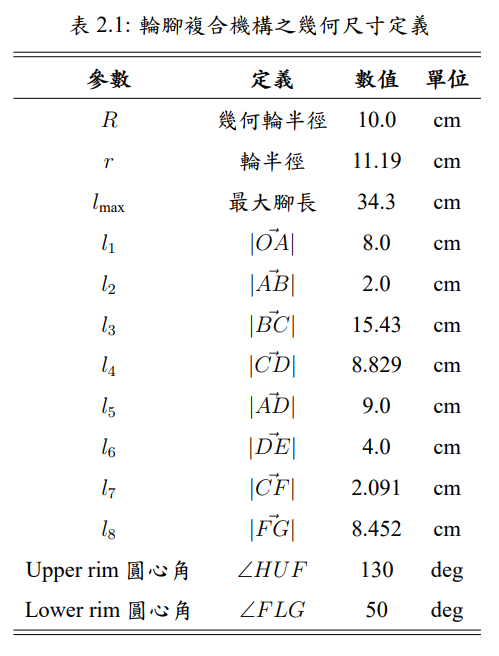

## env setup

In [24]:
import numpy as np
import sys
try:
    import LegModel
    import PlotLeg
    import FittedCoefficient
except ModuleNotFoundError:
    sys.path.append('../')
    import LegModel
    import PlotLeg
    import FittedCoefficient
theta = 17
beta = 0


In [25]:
Leg = LegModel.LegModel()


In [26]:
def complex_to_vec(pos):
    return np.array(pos.real, pos.imag)

In [27]:
def plot_point(ax, point, color='red',plot_leg=PlotLeg.PlotLeg(), zorder=None):
    point = ax.plot(point[0], point[1], marker='o', color=color, markersize=plot_leg.leg_shape.mark_size, zorder=zorder if zorder is not None else plot_leg.leg_shape.zorder+0.00001)[0]


# Plotting Leg

In [28]:

def gen_point(label, coord, offset):
    point_template = {'Label':"",
                    'Coord':(0,0),
                    'Offset':(0,0)}
    point = point_template.copy()
    point['Label'] = label
    point['Coord'] = coord
    point['Offset'] = offset
    return point


In [29]:
General_Points = ['A','B','C','D','F','H','I','J','U']
Point_List = [p+'_l' for p in General_Points
            #   ] + [p+'_r' for p in General_Points
                   ] + ['E','G', 'O_r', 'H_extend_l', 'H_extend_r']
# leg = LegModel.leg
Actual_Points = []
for p in Point_List:
    try:
        p_leg = Leg[p]
        Actual_Points.append(gen_point(p, p_leg, (0,0)))
    except Exception as e:
        print(f'Error plotting {p}: {e}')

In [30]:
def plot_axis(ax, size):
    arrow_length = size*2 - 0.03
    axis_color = ("#5A5A5A",0.5)      # color, transparency
    ax.arrow(-arrow_length/2, 0, arrow_length, 0,
            head_width=0.01, head_length=0.01,
            fc=axis_color, ec=axis_color, zorder=0)

    ax.arrow(0, -arrow_length/2, 0, arrow_length,
            head_width=0.01, head_length=0.01,
            fc=axis_color, ec=axis_color, zorder=0)
    
    ax.text(arrow_length/2, -0.02, 'X', fontsize=12, color='k')
    ax.text(0.01, arrow_length/2, 'Y', fontsize=12, color='k')


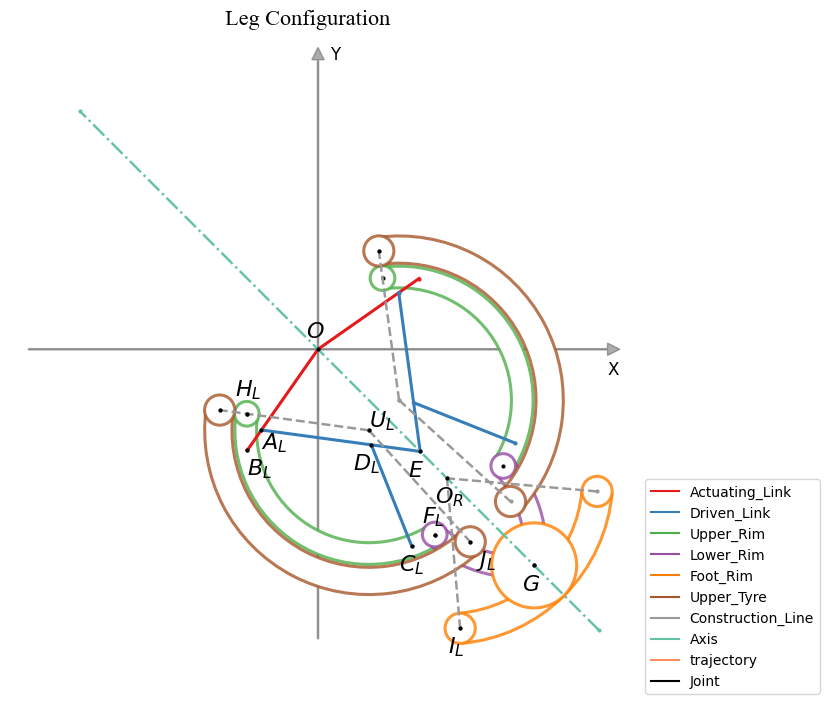

In [31]:
import matplotlib.pyplot as plt

plot_leg = PlotLeg.PlotLeg()  # rad
plot_leg.leg_shape.link_alpha = 1
plot_leg.leg_shape.line_width = 2.2
plot_leg.leg_shape.set_variable('Construction', True)
color_label = plot_leg.leg_shape.color_label
zorder = plot_leg.leg_shape.zorder
theta = np.deg2rad(100)
beta = np.deg2rad(45)

fig, ax = plt.subplots(figsize=(8,8))
plot_leg.plot_by_angle(theta, beta, ax=ax)

# Set equal aspect ratio and axis
ax.set_aspect('equal')
fig_label_limit = 0.25
ax.set_ylim(-fig_label_limit, fig_label_limit)
ax.set_xlim(-fig_label_limit, fig_label_limit)
ax.set_xlabel('X (m)', fontsize=14)
ax.set_ylabel('Y (m)', fontsize=14)
ax.axis('off') 

# Add arrows to show coordinate system
plot_axis(ax, fig_label_limit)

offset_List = {'H_l':(-0.01,0.015),
               'A_l':(0,-0.015),
               'B_l':(0,-0.02),
               'U_l':(0,0.003),
               'D_l':(-0.015,-0.02),
               'F_l':(-0.01,0.01),
               'J_l':(0.005,-0.02)}

# plot_point(ax, plot_leg.rim_point(0), color='red', plot_leg=plot_leg)
plot_leg.to_vector()
for p in Point_List:
    try:
        p_leg = plot_leg[p]
        plot_point(ax, p_leg, color=color_label['Joint'], plot_leg=plot_leg, zorder=zorder+1)
        offset_x = -0.01
        offset_y = -0.02
        if p in offset_List.keys():
            offset_x, offset_y = offset_List[p]
        if 'extend' not in p:
            ax.text(p_leg[0]+offset_x, p_leg[1]+offset_y, f'${p.upper()}$', fontsize=16, zorder=4, font='Times New Roman', fontstyle='oblique')
    except Exception as e:
        print(f'Error plotting {p}: {e}')
# Plot the origin point
plot_point(ax, (0,0), color=color_label['Joint'], plot_leg=plot_leg, zorder=zorder+1)
ax.text(-0.01, 0.01, f'$O$', fontsize=16, zorder=4, font='Times New Roman', fontstyle='oblique')

# Add Legend
for C in color_label.keys():
    ax.plot([], [], color=color_label[C], label=C)
ax.legend(bbox_to_anchor=(1.02, 0.3), loc='upper left')
# ax.grid()
fig.suptitle('Leg Configuration', fontsize=16, y=0.92, font='Times New Roman')
plt.show()

In [32]:
cmap = plt.get_cmap('Set1')
# plt.get_cmap('Set2')
cmap_colors = [cmap(i) for i in range(cmap.N)]
color_set = [plt.get_cmap('Set1')(i) for i in range(plt.get_cmap('Set1').N)]

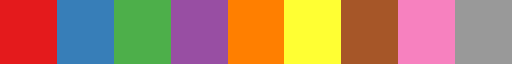

In [33]:
plt.get_cmap('Set1')

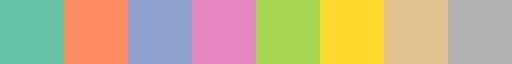

In [34]:
plt.get_cmap('Set2')

In [35]:
def plot_alphas(ax, plot_leg=PlotLeg.PlotLeg(), cmap = plt.cm.plasma, **kwargs):

    # Set equal aspect ratio and axis
    ax.set_aspect('equal')
    fig_label_limit = 0.25
    ax.set_ylim(-fig_label_limit, fig_label_limit)
    ax.set_xlim(-fig_label_limit, fig_label_limit)
    ax.set_xlabel('X (m)', fontsize=14)
    ax.set_ylabel('Y (m)', fontsize=14)
    
    alpha_UR = np.linspace(40.1, 179.9, 100)
    alpha_F = np.linspace(-40, 40, 100)
    alpha_UL = np.linspace(-40.1, -179.9, 100)

    alphas_UR = plot_leg.rim_point(alpha_UR)
    alphas_F = plot_leg.rim_point(alpha_F)
    alphas_UL = plot_leg.rim_point(alpha_UL)

    L = len(alpha_UR) + len(alpha_F) + len(alpha_UL)

    # Plot with gradient colors based on alpha angles
    for i in range(len(alpha_UR)-1):
        ax.plot(alphas_UR[i:i+2, 0], alphas_UR[i:i+2, 1], color=cmap((i+ len(alpha_F) + len(alpha_UL))/L), **kwargs)

    for i in range(len(alpha_F)-1):
        ax.plot(alphas_F[i:i+2, 0], alphas_F[i:i+2, 1], color=cmap((i + len(alpha_UL))/L), **kwargs)

    for i in range(len(alpha_UL)-1):
        ax.plot(alphas_UL[i:i+2, 0], alphas_UL[i:i+2, 1], color=cmap((len(alpha_UL)-i)/L), **kwargs)

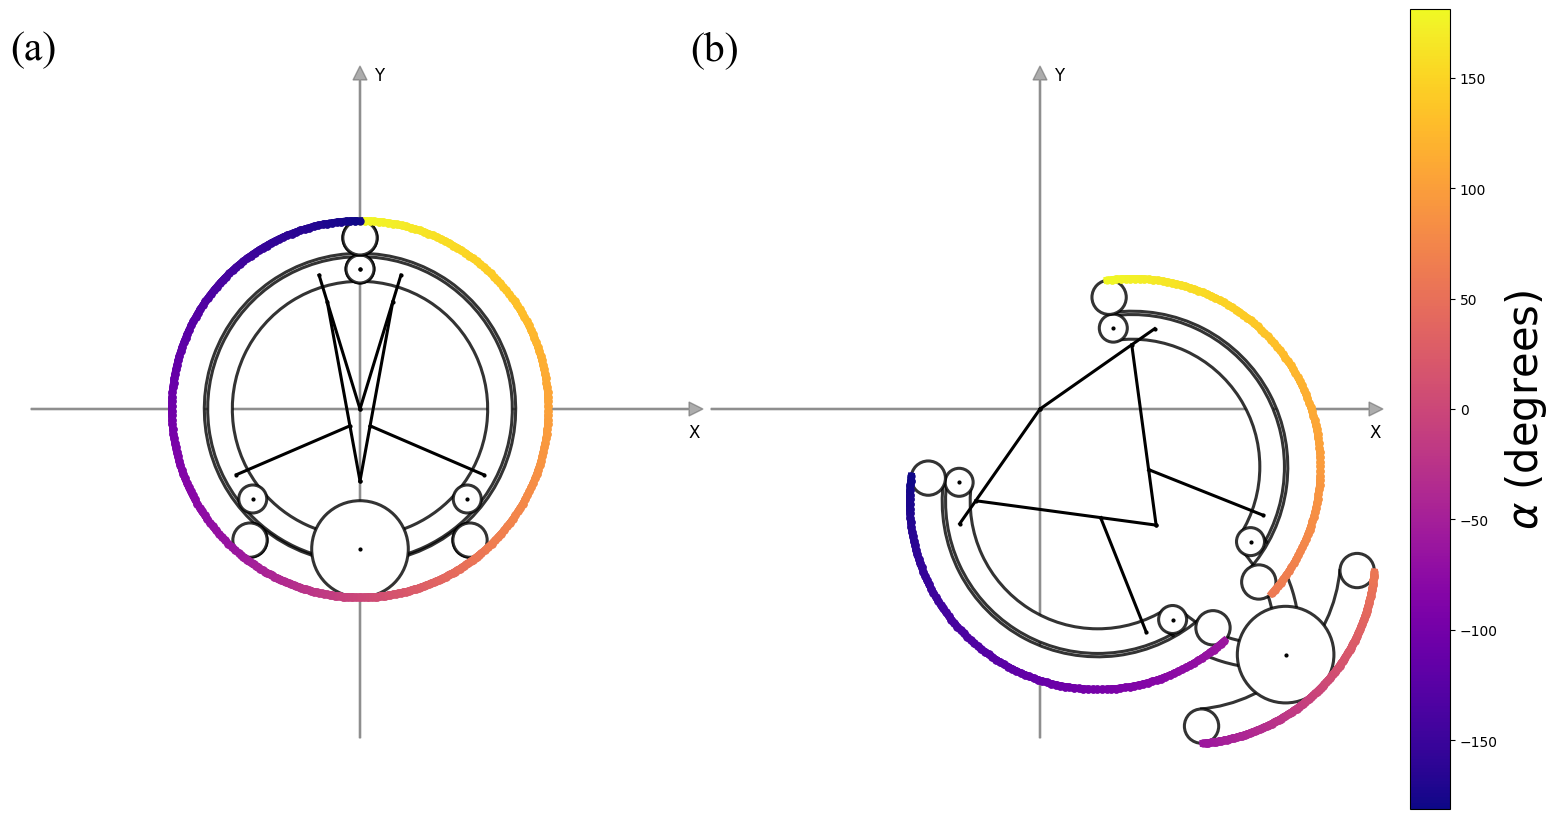

In [36]:
import matplotlib.pyplot as plt
plot_leg = [PlotLeg.PlotLeg(), PlotLeg.PlotLeg()]  # rad
for pl in plot_leg:
    pl.leg_shape.set_variable('Construction', False)
    pl.leg_shape.set_color_type('Black')
    pl.leg_shape.link_alpha = 1
    pl.leg_shape.line_width = 2.2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

plot_leg[0].plot_by_angle(np.deg2rad(17), np.deg2rad(0), ax = ax1)
plot_leg[1].plot_by_angle(theta, beta, ax = ax2)

plot_alphas(ax1, plot_leg=plot_leg[0], linewidth=5, marker='o', markersize=5)
plot_alphas(ax2, plot_leg=plot_leg[1], linewidth=5, marker='o', markersize=5)
cmap = plt.cm.plasma
# Add colorbar to show alpha angle mapping

ax1.axis('off')  # Hide the first subplot axes
ax2.axis('off')  # Hide the second subplot axes
plot_axis(ax1, size=fig_label_limit)
plot_axis(ax2, size=fig_label_limit)
ax1.text(-fig_label_limit, fig_label_limit,'(a)', fontsize=30, font='Times New Roman', fontstyle='normal')
ax2.text(-fig_label_limit, fig_label_limit,'(b)', fontsize=30, font='Times New Roman', fontstyle='normal')

# ax3.axis('off')  # Hide the third subplot axes
ax1.set_position([0.1, 0.1, 0.35, 0.8])  # Left subplot
ax2.set_position([0.44, 0.1, 0.35, 0.8])  # Middle subplot
ax3.set_position([0.8, 0.1, 0.02, 0.8])  # Right subplot (colorbar)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([-181, 181])
cbar = fig.colorbar(sm, cax=ax3, orientation='vertical', fraction=0.02, pad=0.05)
cbar.set_label('$\\alpha$ (degrees)', fontsize=30)

# ax.grid()
plt.show()

# Rim points

## setup

In [37]:
import matplotlib.pyplot as plt

T = np.array([np.deg2rad(i) for i in range(17,160)])
B = np.array([i*0 for i in range(17,160)])
leg = LegModel.LegModel()
leg.forward(T,B)
# rim_dict[alpha] returns a list of rim points for the given alpha in cartesian coordinates
rim_dict = {}
# rim_dict_polar[alpha] returns a list of rim points for the given alpha in polar coordinates
rim_dict_polar = {}

for alpha in range(-180,180,1):
    rim_dict[alpha] = leg.rim_point(alpha)
    rim_dict_polar[alpha] = []
    # Convert cartesian coordinates to polar coordinates
    for point in rim_dict[alpha]:
        r = np.sqrt(point[0]**2 + point[1]**2)
        theta = np.arctan2(point[1], point[0])
        rim_dict_polar[alpha].append((r, theta))
# print(rim_dict[0])



## Plot

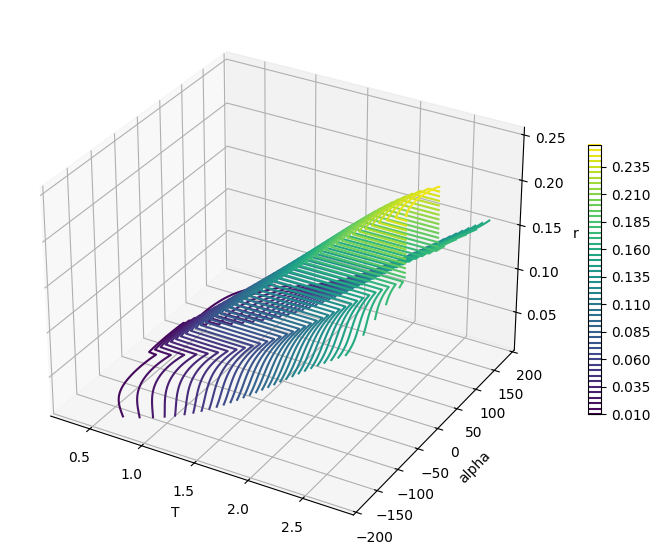

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D contour
T_grid, alpha_grid = np.meshgrid(T, list(rim_dict.keys()))
r_grid = np.zeros_like(T_grid, dtype=float)

for i, a in enumerate(list(rim_dict.keys())):
    for j, t in enumerate(T):
        # Use the first rim point for each alpha and T
        vec = rim_dict_polar[a][j]
        r_grid[i, j] = vec[0]

fig = plt.figure(figsize=(10, 7))
ax3d = fig.add_subplot(111, projection='3d')
contour = ax3d.contour3D(T_grid, alpha_grid, r_grid, 50, cmap='viridis')
ax3d.set_xlabel('T')
ax3d.set_ylabel('alpha')
ax3d.set_zlabel('r')
fig.colorbar(contour, ax=ax3d, shrink=0.5)
plt.show()

### r vs theta

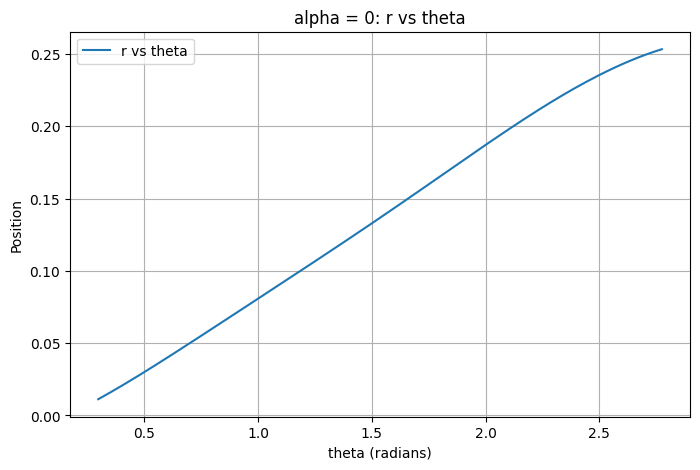

In [39]:
import matplotlib.pyplot as plt

alpha_zero_points = rim_dict_polar[0]
theta_vals = T

r = [pt[0] for pt in alpha_zero_points]
# y = [pt[1] for pt in alpha_zero_points]

plt.figure(figsize=(8, 5))
plt.plot(theta_vals, r, label='r vs theta')
plt.xlabel('theta (radians)')
plt.ylabel('Position')
plt.title('alpha = 0: r vs theta')
plt.legend()
plt.grid()
plt.show()

### r vs alpha ( foot rim )

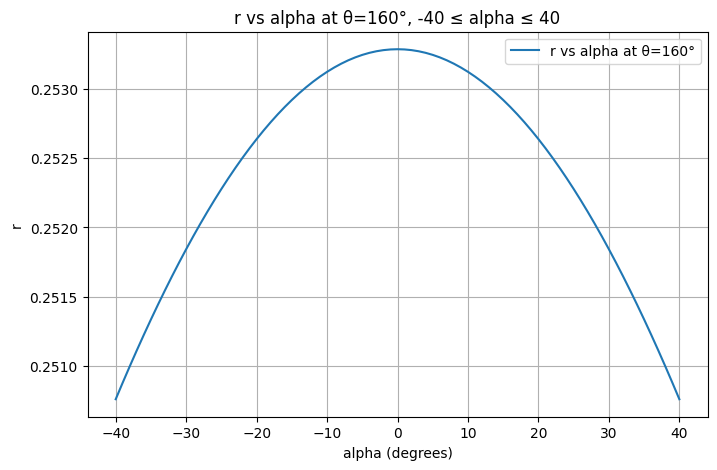

In [40]:
import matplotlib.pyplot as plt

# Find the index in theta_vals closest to 160 degrees in radians
theta_160_rad = np.deg2rad(160)
idx = (np.abs(theta_vals - theta_160_rad)).argmin()

# Extract r values for theta = 160deg across all alpha
r_160 = r_grid[:, idx]
alpha_list = list(rim_dict.keys())

# Filter alpha and r_160 for -40 <= alpha <= 40
alpha_filtered = [a for a in alpha_list if -40 <= a <= 40]
r_160_filtered = [r_160[i] for i, a in enumerate(alpha_list) if -40 <= a <= 40]

plt.figure(figsize=(8, 5))
plt.plot(alpha_filtered, r_160_filtered, label='r vs alpha at θ=160°')
plt.xlabel('alpha (degrees)')
plt.ylabel('r')
plt.title('r vs alpha at θ=160°, -40 ≤ alpha ≤ 40')
plt.legend()
plt.grid()
plt.show()


# Trajectory

## assumptions 
1. pure rolling at contact
2. contact point is normal to ground

    $ \overline{OO_r} =\hat{G}' - \hat{G}_0 $

    $L = 2\overline{OO_r}\sin(\beta)$

    $h = r_{rim} + \overline{OO_r}\cos(\beta)$

    $D = \displaystyle{\frac{L + R'2\beta}{3}}$

    $\displaystyle{=\frac{2\overline{OO_r}\sin(\beta)+R'2\beta}{3}}$

    $ W = L+D $

the height $h$ and distance $D$ would be desided by initial $\theta$ and $\beta$




## Duty Planning

$t_{d,sw}:t_{d,st} = 1:3$

Stand Time vs Swing Time would be 1:3 due to walking gait planning

$\displaystyle{\vec{V} = \frac{D}{t_{d,sw}}}$

## Traj API

### Class usage

In [41]:
# import 
import Trajectory_Planning as TJ
# declare
Traj = TJ.TrajectoryPlanner(stand_height=0.3,
                            step_length=0.4,
                            leg=LegModel.LegModel(),
                            step_height=0.04,
                            period=10,
                            dt=0.001,
                            duty=1 / 4,
                            overlap=0.2)
# set_speed : set target speed in m/s
Traj.set_speed(0.04)

# generate trajectory curve
Traj.move()

# get Curve Data in [x,y] points
sp = Traj.generate_swing_trajectory()

#get theta beta cmd
# type: 2d list [[theta0,beta0] ...[theta_n, beta_n] ]
curve_cmd = Traj["cmd"]


### validation

In [42]:
print(type(curve_cmd ))

<class 'list'>


### Plot: h vs D only changing $\theta$

In [43]:
THETA = np.array([np.deg2rad(i) for i in range(17,161)])
BETA = np.array([0 for i in range(17,161)])
leg.forward(THETA,BETA, vector=False)
OO_r = np.array([-leg["O_r"].imag]).T
beta_ = np.deg2rad(40)
r_rim = (leg["R"] + leg["foot_offset"] + leg["tyre_thickness"])
L = OO_r*2*np.sin(beta_)
H = r_rim + OO_r*np.cos(beta_)
D = (L+r_rim*2*beta_)/3
W = L+D


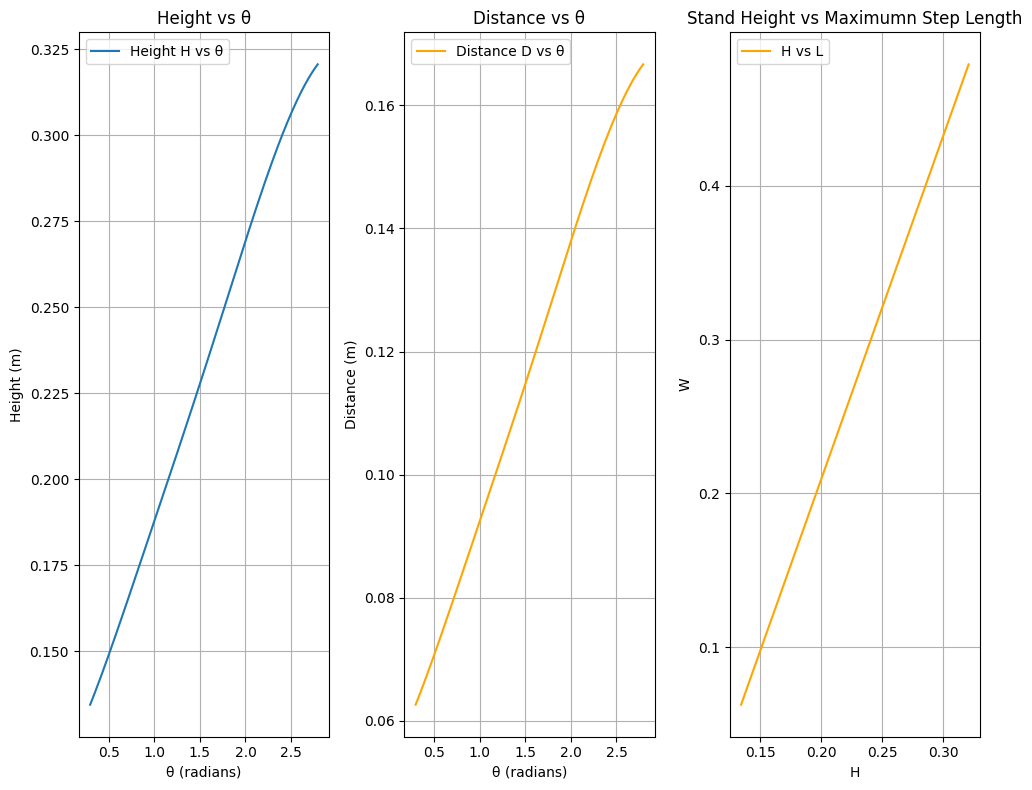

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 8))

# Plot Height vs theta
ax1.plot(THETA, H, label='Height H vs θ')
ax1.set_xlabel('θ (radians)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Height vs θ')
ax1.legend()
ax1.grid()

# Plot Distance vs theta
ax2.plot(THETA, D, label='Distance D vs θ', color='orange')
ax2.set_xlabel('θ (radians)')
ax2.set_ylabel('Distance (m)')
ax2.set_title('Distance vs θ')
ax2.legend()
ax2.grid()

# Plot Distance vs theta
ax3.plot(H, W, label='H vs L', color='orange')
ax3.set_xlabel('H')
ax3.set_ylabel('W')
ax3.set_title('Stand Height vs Maximumn Step Length')
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()


## flow for trajectary planning
1. Select Stand Height and Step Length
2. get start point ($\theta, \beta$)
3. derive bezier curve
4. combine two curves

### init setup

In [45]:
from Solver import Solver
import numpy as np
from FittedCoefficient import inv_G_dist_poly
import Trajectory_Planning as TJ
stand_height = 0.35
step_length = 0.3
leg = LegModel.LegModel()
traj = TJ.TrajectoryPlanner(stand_height=0.3,
                            step_length=0.4,
                            leg=LegModel.LegModel(),
                            step_height=0.04,
                            period=10,
                            dt=0.001,
                            duty=1 / 4,
                            overlap=0.2)
theta0, beta0, D = traj.get_init_tb()

### Plot: rolling start point

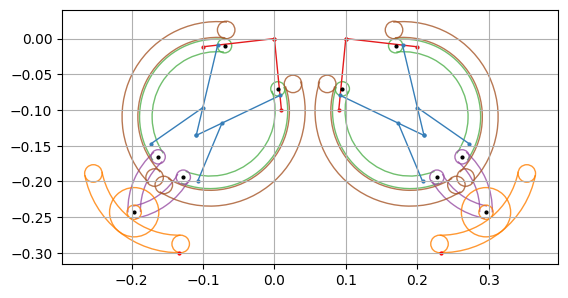

In [ ]:
np.rad2deg([theta0, beta0])
plot_leg = PlotLeg.PlotLeg(leg)  # rad

# plot lift off point
ax = plot_leg.plot_by_angle(theta0, -beta0)
plot_point(ax, plot_leg.rim_point(np.rad2deg(beta0)), color='red', plot_leg=plot_leg)

# plot touch down point
plot_leg.plot_by_angle(theta0, beta0, O= (traj.D,0), ax=ax)
P = plot_leg.rim_point(np.rad2deg(-beta0))
plot_point(ax, (P[0]+traj.D,P[1]), color='red', plot_leg=plot_leg)
# ax.grid()
plt.show()

### func: init $\theta$, $\beta$ using stand height and step length

In [47]:
# ====================< function to joint angles >===================
# function to transfer stand height and step length to joint angles
# ===================================================================
def get_init_tb(stand_height, step_length, leg = LegModel.LegModel()):

    H = stand_height-leg["foot_radius"]
    func = lambda x: (H)*np.tan(x) + leg["foot_radius"]*x - 3*step_length/8
    # solver to solve beta
    solver = Solver(
        method="Secant",
        tol=1e-6,
        max_iter=100,
        function= func,
        derivative= lambda x: (H)*np.sec(x)**2 + leg["foot_radius"] - 3*step_length/8
    )
    beta0 = solver.solve(0, np.deg2rad(40))

    # calculate foot position
    G_dist = (H)/np.cos(beta0) + leg["R"]
    OO_r_Dist = G_dist - leg["R"]
    theta0 = inv_G_dist_poly(G_dist)

    L = 2*OO_r_Dist*np.sin(beta0)       # distance of ground contact to hip joint in X axis
    D = (L+leg.foot_radius*2*beta0)/3   # movement of hip joint in X axis during one step
    return theta0, beta0, D


### Plot: Swing Phase Curve

#### Plot 1: generated curve by trajectory

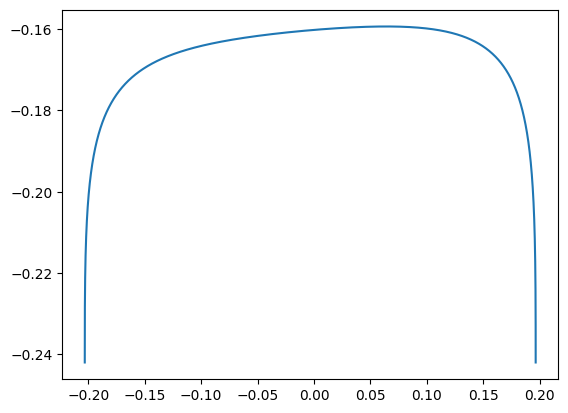

In [48]:
from bezier import swing
import time
import Trajectory_Planning as TJ
traj_planner = TJ.TrajectoryPlanner(stand_height=0.3,
                                    step_length=0.6,
                                    leg=LegModel.LegModel(),
                                    step_height=0.08,
                                    period=10,
                                    dt=0.001,
                                    duty=1 / 8,
                                    overlap=0.2)
traj_planner.set_speed(0.2)
traj_planner.move()

leg = LegModel.LegModel()
theta0, beta0, D = traj_planner.get_init_tb()

start = time.time()
sp = traj_planner.generate_swing_trajectory()
end = time.time()
d = np.linspace(0, 1, 10000)
curve_points = [sp.getFootendPoint(_) for _ in d]
x_ = [p[0] for p in curve_points]
y_ = [p[1] for p in curve_points]
plt.plot(x_, y_)
plt.show()

#### Plot 2: validation in ploar coord.

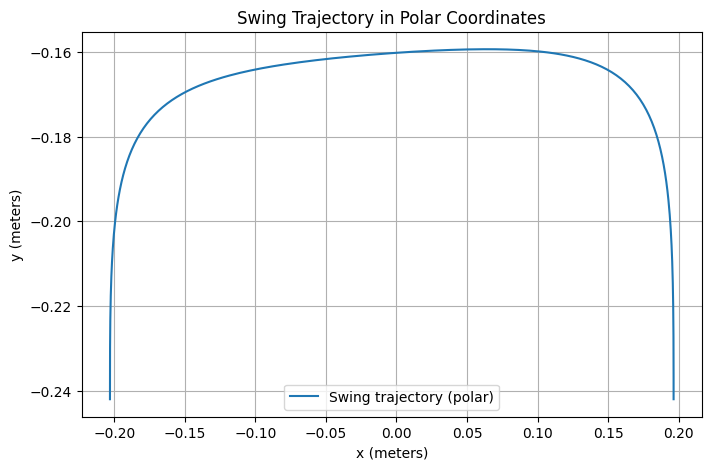

In [49]:
polar = traj_planner["swing_points_polar"]
import matplotlib.pyplot as plt

# Extract r and theta from polar coordinates
x = [p[0]*np.cos(p[1]) for p in polar]
y = [p[0]*np.sin(p[1]) for p in polar]

plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Swing trajectory (polar)')
plt.xlabel('x (meters)')
plt.ylabel('y (meters)')
plt.title('Swing Trajectory in Polar Coordinates')
plt.legend()
plt.grid()
plt.show()

#### Plot 3: validation using $\theta,\beta$ command

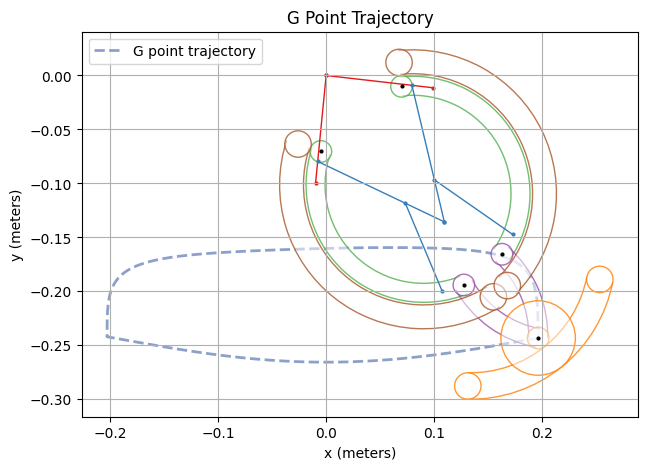

In [53]:
plot_leg = PlotLeg.PlotLeg(leg)  # rad
plot_leg.leg_shape.set_variable('link_alpha',0.5)
CMD = np.array(traj_planner["cmd"])
THETA = CMD.transpose(1,0)[0]
BETA = CMD.transpose(1,0)[1]
leg.forward(THETA,BETA, vector=False)
point_g = leg["G"].copy()

fig,ax = plt.subplots(figsize=(8, 5))
ax.plot(point_g.real, point_g.imag,
        label='G point trajectory',
        linestyle='--',linewidth=2,
        color=plot_leg.leg_shape.color_set[11],
        zorder=plot_leg.leg_shape.zorder-1)
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_title('G Point Trajectory')
plot_leg.plot_by_angle(traj_planner.theta0, traj_planner.beta0, ax=ax)
ax.legend()
ax.grid()
plt.show()

#### testing

In [ ]:
def transform(joint):
    # build cmd to transfer from [17 deg, 0] to [joint] in 5000 steps
    theta, beta = joint[0], joint[1]
    T = np.linspace(np.deg2rad(17), theta, 5000).tolist()
    B = np.linspace(0, beta, 5000).tolist()
    # stack into two columns: [[theta0, beta0], ...]
    # cmd = [[T[i], B[i]] for i in range(5000)]
    cmd = [[T], [B]]
    return cmd

In [ ]:
T[0]

## 2D contour for (D,H) $\theta , \beta $

In [ ]:
THETA = np.array([np.deg2rad(i) for i in range(17,161)])
BETA = np.array([0 for i in range(17,161)])
leg.forward(THETA,BETA, vector=False)
OO_r = np.array([-leg["O_r"].imag]).T
beta_ = [np.deg2rad(i) for i in [0,10,20,30,40]]
D_dict = {}
W_dict = {}
H_dict = {}

for b in beta_:
    r_rim = (leg["R"] + leg["foot_offset"] + leg["tyre_thickness"])
    L = OO_r*2*np.sin(b)
    H = r_rim + OO_r*np.cos(b)
    D = (L+r_rim*2*b)/3
    
    W_dict[b] = L+D
    D_dict[b] = D
    H_dict[b] = H

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 7))

l_ = [0,10,20,30,40]
for b in beta_:
    # Plot Height vs theta for different beta values
    ax1.plot(THETA, H_dict[b], label=f'β={l_[beta_.index(b)]}°')
    # Plot Distance vs theta for different beta values
    ax2.plot(THETA, D_dict[b], label=f'β={l_[beta_.index(b)]}°')
    # Plot Walk length vs theta for different beta values
    ax3.plot(THETA, W_dict[b], label=f'β={l_[beta_.index(b)]}°')

ax1.set_xlabel('θ (radians)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Height vs θ for different β')
ax1.legend()
ax1.grid()

ax2.set_xlabel('θ (radians)')
ax2.set_ylabel('Distance (m)')
ax2.set_title('Distance vs θ for different β')
ax2.legend()
ax2.grid()

ax3.set_xlabel('θ (radians)')
ax3.set_ylabel('Walk Length (m)')
ax3.set_title('Walk Length vs θ for different β')
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()


In [ ]:
max(W_dict)

# Optimize Solver for equations

In [ ]:
from Solver import Solver

In [ ]:
# Example usage
# solve: x^2 = 2
solver = Solver(
    method="Newton",
    tol=1e-6,
    max_iter=100,
    function=lambda x: x**2 - 2,
    derivative=lambda x: 2*x
)
root = solver.solve(1.0)
print("Root found:", root)

In [ ]:
import numpy as np
# example sin(a) = sqrt(2)/2
solver = Solver(
    method="Regula Falsi",
    tol=1e-6,
    max_iter=100,
    function=lambda x: np.sin(x) - np.sqrt(2)/2,
    derivative=lambda x: np.cos(x)
)
root = solver.solve(np.pi/3, np.pi/8)
print("Root found:", np.rad2deg(root))

# Design of Experiment(DOE)

## Params.
1. Velocity
2. Stand Height
3. Step Length
4. step height

## DOE
Since there are too many combinations, we must pick serval datas to analyze
Using 

### generate experinment table

#### Exp table 0901

In [ ]:
# 產生新實驗設計：使用使用者提供的水準
# 假設說明（我會在回覆中說明）：
# - V 代表速度，使用者給的 [5,10,20,30] 我假設單位是 cm/s -> 轉換為 m/s（除以100）供實驗表使用
# - H 代表機身高度 body_h (cm)：[20,25,30]
# - L 代表步長 step_len (cm)：[15,20,30,40]
# - foot_lift 保持固定為 4 cm（如需改再告訴我）
#
# 產生全因子設計：3 * 4 * 4 = 48 組條件
# 輸出：design_48_runs.csv 與 experiment_record_template_48.csv，並顯示前 20 列

import itertools, random, pandas as pd

# 使用者提供的水準
V_cm_per_s = [5, 10, 20, 30]  # user-specified; assume cm/s -> convert to m/s
V_m_per_s = [v/100.0 for v in V_cm_per_s]  # m/s
H_cm = [20, 25, 30]  # body height in cm
L_cm = [15, 20, 30, 40]  # step length in cm
foot_lift_fixed = 8  # cm, kept from previous setting

# 產生組合
combinations = list(itertools.product(H_cm, L_cm, V_m_per_s))
design = []
for idx, (h, l, v) in enumerate(combinations, start=1):
    design.append({
        'run_index': idx,
        'body_h_cm': h,
        'step_len_cm': l,
        'speed_m_per_s': v,
        'speed_cm_per_s': int(v*100),  # keep original user units for clarity
        'foot_lift_cm': foot_lift_fixed
    })

design_df = pd.DataFrame(design)

# 隨機化順序（固定 seed 42 以便重現）
random.seed(42)
shuffled = design_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled['rand_order'] = range(1, len(shuffled)+1)

# 儲存 CSV
design_path = 'design_48_runs.csv'
# shuffled.to_csv(design_path, index=False)

# 建立實驗紀錄範本（含必要欄位）
template_cols = [
    'rand_order', 'run_index', 'date', 'operator', 'body_h_cm', 'step_len_cm', 'speed_cm_per_s', 'speed_m_per_s',
    'foot_lift_cm', 'distance_m', 'time_s', 'avg_voltage_V', 'avg_current_A', 'energy_Wh', 'avg_power_W',
    'CoT', 'Wh_per_m', 'SOC_start_percent', 'SOC_end_percent', 'temp_C', 'notes'
]
template_df = shuffled.copy()
# 新增欄位（空白）
for col in template_cols:
    if col not in template_df.columns:
        template_df[col] = ""

# 重新排列欄位順序並儲存
template_df = template_df[template_cols]
template_path = 'experiment_record_template_48.csv'
# template_df.to_csv(template_path, index=False)

# 顯示前 20 列
# display_dataframe_to_user("Design (48 runs) - first 20 rows", shuffled.head(20))

{"design_csv": design_path, "template_csv": template_path, "n_runs": len(shuffled)}


#### Exp Table 0904

In [ ]:
a = [round(i*0.2+0.8,2) for i in range(8)]            # step length in cm
a

In [ ]:
import itertools, random, pandas as pd

# 使用者提供的水準
V_cm_per_s = [5, 10, 15, 20, 30]                # user-specified; assume cm/s -> convert to m/s
V_m_per_s = [v/100.0 for v in V_cm_per_s]   # m/s
H_cm = [20, 25, 30]                         # body height in cm
a_ratio = [round(i*0.2+0.8,2) for i in range(6)]  # step length in cm
foot_lift_fixed = 8                         # cm, kept from previous setting

# 產生組合
combinations = list(itertools.product(H_cm, a_ratio, V_m_per_s))
design = []
for idx, (h, a_, v) in enumerate(combinations, start=1):
    design.append({
        'run_index'     : idx + 48,
        'body_h_cm'     : h,
        'step_len_cm'   : a_* h,
        'a'             : a_,
        'speed_m_per_s' : v,
        'foot_lift_cm'  : foot_lift_fixed
    })

design_df = pd.DataFrame(design)
path = 'Exp index 0904.csv'
design_df.to_csv(path, index=False)

In [ ]:
path = 'Exp index 0904.csv'
df = pd.read_csv(path)
df

### repeat 3 times

In [ ]:
# 由於 kernel reset，需重新執行：重建資料框架並加 unique_id 與 replicate 欄位
import pandas as pd
import itertools, random

# 使用者提供的水準
V_cm_per_s = [5, 10, 20, 30]  # cm/s
V_m_per_s = [v/100.0 for v in V_cm_per_s]  # m/s
H_cm = [20, 25, 30]  # cm
L_cm = [15, 20, 30, 40]  # cm
foot_lift_fixed = 4  # cm

# 產生組合 (48 runs)
combinations = list(itertools.product(H_cm, L_cm, V_m_per_s))
design = []
for idx, (h, l, v) in enumerate(combinations, start=1):
    design.append({
        'run_index': idx,
        'body_h_cm': h,
        'step_len_cm': l,
        'speed_m_per_s': v,
        'speed_cm_per_s': int(v*100),
        'foot_lift_cm': foot_lift_fixed
    })

design_df = pd.DataFrame(design)

# 隨機化順序
shuffled = design_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled['rand_order'] = range(1, len(shuffled)+1)

# 建立實驗紀錄範本（含必要欄位）
template_cols = [
    'rand_order', 'run_index', 'date', 'operator', 'body_h_cm', 'step_len_cm',
    'speed_cm_per_s', 'speed_m_per_s', 'foot_lift_cm',
    'distance_m', 'time_s', 'avg_voltage_V', 'avg_current_A', 'energy_Wh',
    'avg_power_W', 'CoT', 'Wh_per_m', 'SOC_start_percent', 'SOC_end_percent',
    'temp_C', 'notes'
]
template_df = shuffled.copy()
for col in template_cols:
    if col not in template_df.columns:
        template_df[col] = ""

template_df = template_df[template_cols]

# --- 新增 replicate 與 unique_id ---
n_reps = 3
expanded_rows = []
for _, row in template_df.iterrows():
    for rep in range(1, n_reps+1):
        new_row = row.copy()
        new_row['replicate'] = rep
        new_row['unique_id'] = f"{int(row['run_index'])}_{rep}"
        expanded_rows.append(new_row)

expanded_df = pd.DataFrame(expanded_rows)

# 儲存新檔案
expanded_path = 'experiment_record_template_48_with_reps.csv'
# expanded_df.to_csv(expanded_path, index=False)

expanded_path


### generate exp csv

In [ ]:
import pandas as pd
path = 'design_48_runs.csv'
df = pd.read_csv(path)
df

In [ ]:
for i in df.index:
    print(df['run_index'][i])

In [ ]:
from Gait_Generator import Gait_Generator
gait = Gait_Generator()
gait.generate_gait()

In [ ]:
df = pd.DataFrame(np.array(gait.CMDS).T)
df
